In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),   #converts an image or numpy array into pytorch tensor and the RGB pixel values are scaled down to [0,1]
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) #maen and std dev for each RGB channel
])

In [ ]:
train_dataset = torchvision.datasets.CIFAR10(
    root = './data', train=True, download=True, transform=transform
)
test_dataset = torchvision.datasets.CIFAR10(
    root = './data', train=False, download=True, transform=transform
)
#root is the directory where data need to be stored

In [ ]:
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=64, shuffle=True, num_workers=2
)
test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=64, shuffle=False, num_workers=2
)
#to train the data in batches and num workers is how many CPU process in parallel

In [ ]:
class SimpleCNN(nn.Module):
  def __init__(self):
    super(SimpleCNN, self).__init__()

    self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
    self.conv2 = nn.Conv2d(in_channels=16, out_channels=32,kernel_size=3, padding=1)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc1 = nn.Linear(32 * 8 * 8, 256)
    self.fc2 = nn.Linear(256, 10)

  def forward(self,x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 32 * 8 * 8)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

In [ ]:
criterion = nn.CrossEntropyLoss()
model = SimpleCNN()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 10
for epoch in range(num_epochs):
  model.train()
  running_loss = 0.0
  for i, (inputs, labels) in enumerate(train_loader):
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  print(f'Epoch {epoch+1}, Loss: {running_loss / len(train_loader):.3f}')

Epoch 1, Loss: 1.415
Epoch 2, Loss: 1.045
Epoch 3, Loss: 0.888
Epoch 4, Loss: 0.779
Epoch 5, Loss: 0.679
Epoch 6, Loss: 0.585
Epoch 7, Loss: 0.498
Epoch 8, Loss: 0.418
Epoch 9, Loss: 0.336
Epoch 10, Loss: 0.268


In [ ]:
model.eval()  # Disable dropout/batch norm
correct = 0
total = 0
with torch.no_grad():  # No gradient computation for speed
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)  # Get class with highest probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

Test Accuracy: 70.99%


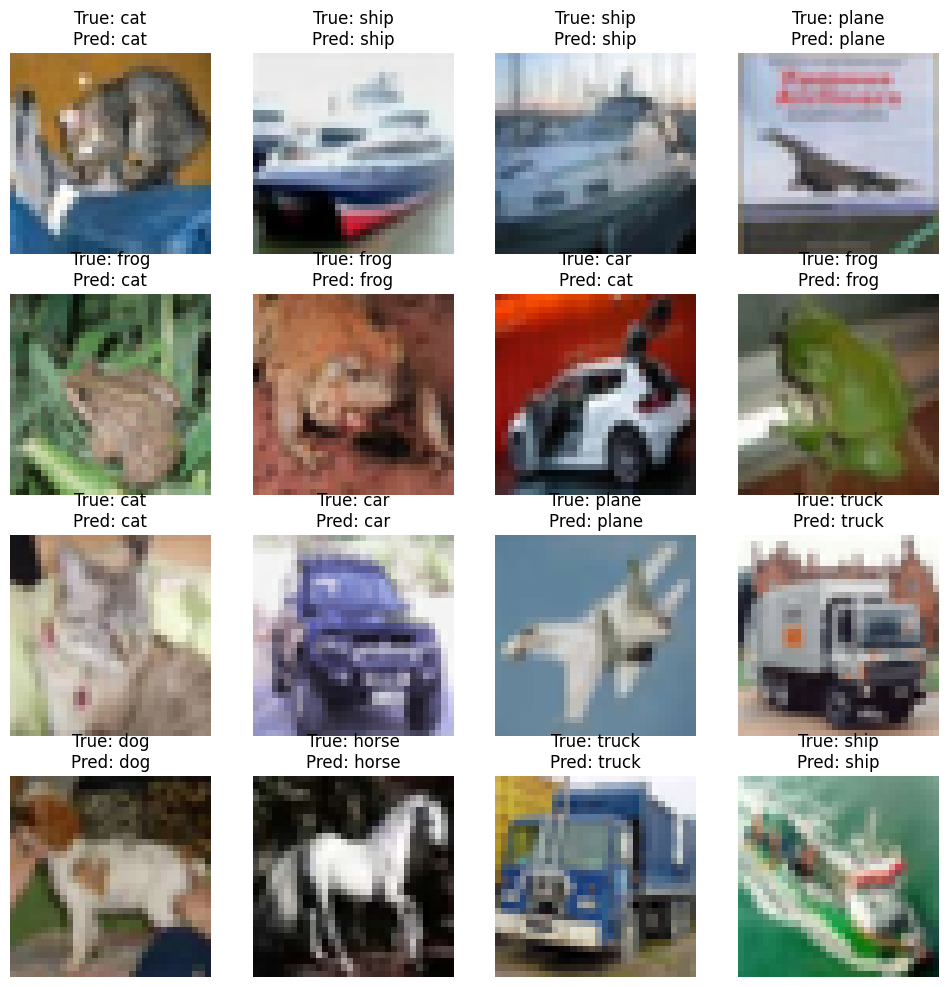

In [ ]:
# Get a batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)
# Predict
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Visualize results
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
for idx in range(16):
    ax = axes[idx//4, idx%4]
    ax.imshow(np.transpose(images[idx].cpu().numpy(), (1, 2, 0)) * 0.5 + 0.5)  # Unnormalize
    ax.set_title(f'True: {classes[labels[idx]]}\nPred: {classes[predicted[idx]]}')
    ax.axis('off')
plt.show()